# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

---


Выполнили студенты гр. 2384 Исмаилов Максим Владимирович и Дамакин Роман Павлович. Вариант №15.

## Цель работы

Получение практических навыков выполнения филтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

---

### Дискретный комплексный гармонический сигнал

Рассматривается дискретный комплексный гармонический сигнал вида
$s(k) = C e^{j \omega_0 k}, \quad k \in \mathbb{N}$,

где $C$ — комплексная амплитуда, а $\omega_0$ — циклическая частота.

---

### Дискретный нерекурсивный фильтр

Для дискретного сигнала $x(n)$, $n \in [0, N-1]$, нерекурсивный (КИХ) фильтр в общем виде описывается выражением:
$$
y_n = \sum_{k=0}^{m} c_k x_{n-k},
$$
где $c_k$ — коэффициенты фильтра, а $y_n$ — выходной сигнал.

---

### Дискретный рекурсивный фильтр

Для сигнала $x(n)$, $n \in [0, N-1]$, рекурсивный (БИХ) фильтр задаётся формулой:
$$
y_n = \sum_{k=0}^{p} a_k y_{n-k} + \sum_{k=0}^{m} b_k x_{n-k},
$$
где $a_k$ и $b_k$ — коэффициенты фильтра, определяющие зависимость текущего значения выхода от прошлых значений выхода и входа.

---

### Передаточная функция

Передаточная функция фильтра описывает, как он изменяет амплитуду и фазу сигнала в зависимости от частоты. Для гармонического сигнала вводится соотношение:
$$
y_n = H(\omega), x_n, \quad \text{откуда} \quad H(\omega) = \frac{y_n}{x_n}.
$$

Если на вход подаётся гармонический сигнал $x_n = e^{j \omega n}$, то передаточную функцию можно найти, решив уравнение
$$
H(\omega) x_n = \sum_{k=0}^{p} a_k H(\omega) x_{n-k} + \sum_{k=0}^{m} b_k x_{n-k}
$$
относительно $H(\omega)$.

Зависимость передаточной функции от циклической частоты можно записать как
$$
H(2\pi f) = \tilde{H}(f).
$$

---

### Численное дифференцирование сигнала

Задача численного дифференцирования заключается в приближённом вычислении производной $k$-го порядка по дискретным отсчётам сигнала. Для этого используются различные формулы численного дифференцирования.

Для оценки качества формулы удобно рассматривать, как отношение численного результата к истинному значению производной зависит от частоты $\omega$:
$$
Q(\omega) = \frac{d_1}{d},
$$
где $d$ — точное значение производной, а $d_1$ — значение, полученное численным методом.

---

### Численное интегрирование сигнала

Численное интегрирование направлено на приближённое вычисление интеграла сигнала по его дискретным отсчётам. Для этого применяются различные формулы численного интегрирования.

Качество формулы можно описать зависимостью отношения численного результата к истинному интегралу от частоты $\omega$:
$$
Q(\omega) = \frac{I_1}{I},
$$
где $I$ — точное значение интеграла, а $I_1$ — найденное численно.

---

### Дискретное преобразование Фурье

Дискретное преобразование Фурье (ДПФ) позволяет перейти от временного представления дискретного сигнала к его представлению в частотной области.

Пусть задан дискретный сигнал $x(n)$ длины $N$, где $n = 0, 1, \dots, N-1$. Тогда прямое ДПФ определяется формулой:
$$
X(k) = \sum_{n=0}^{N-1} x(n), e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \dots, N-1.
$$

Здесь:

* $X(k)$ — комплексный спектральный коэффициент, соответствующий частоте $\omega_k = \frac{2\pi k}{N}$;
* $x(n)$ — значения сигнала во временной области;
* $N$ — число отсчётов;
* $j$ — мнимая единица, $j^2 = -1$;
* $e^{-j \frac{2\pi}{N} k n}$ — дискретная комплексная гармоника.

Таким образом, спектр $X(k)$ описывает амплитуду и фазу синусоидальных составляющих различных частот, из которых состоит исходный сигнал.


---

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

Ниже представлена программа, которая формирует дискретный сигнал посредством дисретизации с шагом T = 1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида Akcos(ωkt+φk).

In [ ]:
N = 31                                                            # длина последовательности
num_harmonics = 11                                                # количество гармоник
np.random.seed(14)
T = 1
A = np.random.randint(1, 12, num_harmonics)                       # амплитуды гармоник
A = A / np.sum(A)                                                 # нормировка амплитуд
omega = np.linspace(0, np.pi, num_harmonics)                      # частоты гармоник
phi = np.random.uniform(0, 0.5, num_harmonics)                    # фазы гармоник
time_array = np.linspace(0, N, N + 1)                             # временнои интервал
anolog_time_array = np.linspace(0, N, (N + 1) * 1000)
model_signal = lambda time: sum(A * np.cos(omega * time + phi))


## Задание 2

Ниже представлена визуализация исходного аналогового и дискретного сигнала.

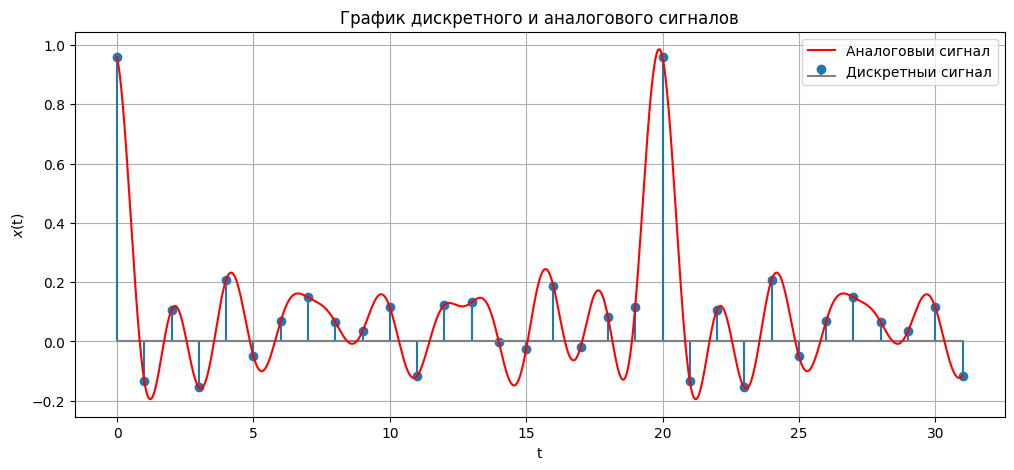

In [ ]:
discreate_signal = [model_signal(time) for time in
time_array]
analog_signal = [model_signal(time) for time in
analog_time_array]
def plot_for_discreate_and_analog_signal():
  plt.figure(figsize=(12, 5))
  plt.ylabel("$x$(t)")
  plt.xlabel('t')
  plt.stem(time_array, discreate_signal, basefmt =
  "grey", label="Дискретныи сигнал")
  plt.plot(analog_time_array, analog_signal, color =
  "red", label="Аналоговыи сигнал")
  plt.title("График дискретного и аналогового сигналов")
  plt.grid(True)
  plt.legend()
  plt.show()
plot_for_discreate_and_analog_signal()


## Задание 3

Ниже представлена визуализация дискретных отсчетов спектра дискретного сигнала найденных с помощью ДПФ.

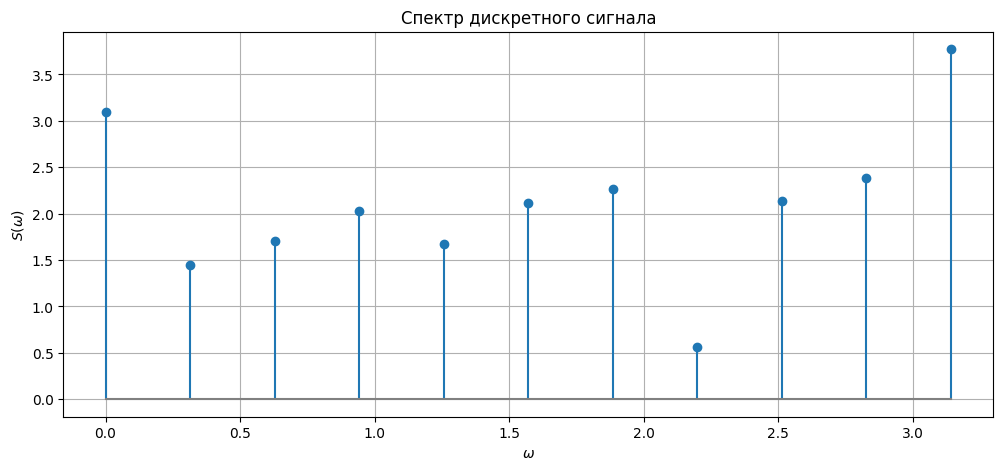

In [ ]:
compute_dft = lambda w, signal: sum(signal * np.exp(-1j * w * time_array))
dft = [compute_dft(w, discreate_signal) for w in omega]
def plot_for_spectrum(spectrum, x):
  plt.figure(figsize=(12, 5))
  plt.stem(x, np.abs(spectrum), basefmt="gray")
  plt.grid(True)
  plt.title("Спектр дискретного сигнала")
  plt.xlabel("$\\omega$")
  plt.ylabel("$S(\\omega)$")
  plt.show()
plot_for_spectrum(dft, omega)

## Задание 4

Общая формула предаточной функции нерекурсивного фильтра, соответсвующего сглаживающей прямой линией:

$$
H(\omega) = \dfrac{1}{2m + 1}\bigl(1 + 2\cos(\omega) + 2\cos(2\omega) + \dots + 2\cos((m-1)\omega) + 2\cos(m\omega)\bigr)
$$

Формула для H(ω) при сглаживании прямой линией по 5
точкам(m=2):

$$
H(\omega) = \dfrac{1}{5}\bigl(1 + 2\cos(\omega) + 2\cos(2\omega)\bigr)
$$


Формула для H(ω) при сглаживании прямой линией по 9
точкам(m=4):

$$
H(\omega) = \dfrac{1}{9}\bigl(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega)\bigr)
$$


In [ ]:
def model_transfer_function_for_straight_line_smoothing(omega, m):
  result = np.zeros_like(omega)
  result += 1
  for i in range(1, m + 1):
    result += 2 * np.cos(i * omega)
    result /= 2 * m + 1
  return result

model_filtered_signal = lambda time, m, transfer_function: sum(A * transfer_function(omega, m) * np.cos(omega * time + phi))
linearly_5_filtered_signal = [model_filtered_signal(time, 2, model_transfer_function_for_straight_line_smoothing) for time in time_array]
linearly_9_filtered_signal = [model_filtered_signal(time, 4, model_transfer_function_for_straight_line_smoothing) for time in time_array]

## Задание 5

Ниже представлена программа, которая визуализирует полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

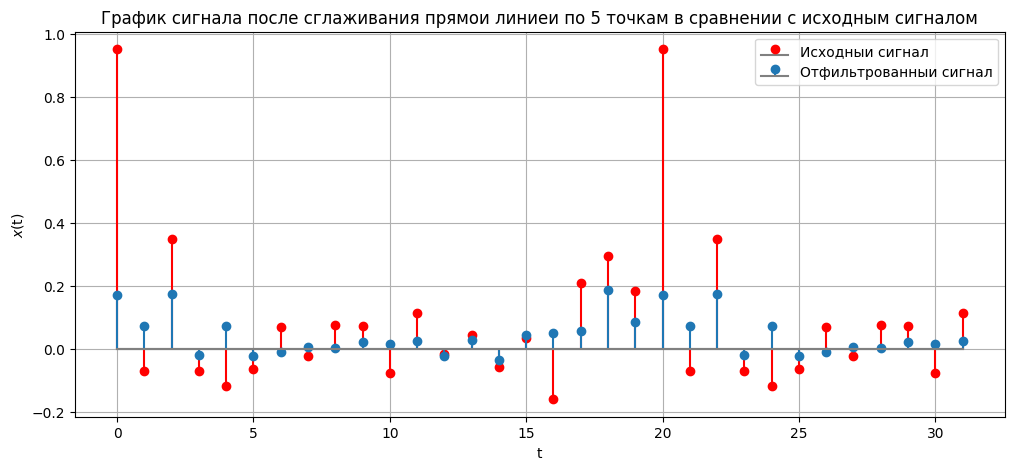

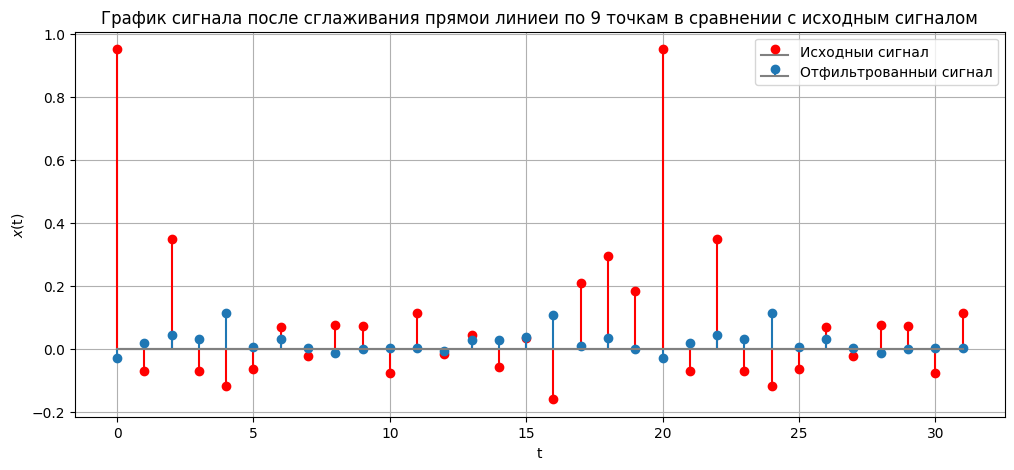

In [ ]:
def plot_for_comparison(x, signal, base_signal, title, xlabel, ylabel):
  plt.figure(figsize=(12, 5))
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.stem(x, base_signal, basefmt="gray",
  label="Исходныи сигнал",linefmt="red")
  plt.stem(x, signal, basefmt="gray",
  label="Отфильтрованныи сигнал")
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.show()
plot_for_comparison(time_array, linearly_5_filtered_signal, discreate_signal, "График сигнала после сглаживания прямои линиеи по 5 точкам в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, linearly_9_filtered_signal, discreate_signal, "График сигнала после сглаживания прямои линиеи по 9 точкам в сравнении с исходным сигналом", "t", "$x$(t)")

Из полученных графиков можно предположить, что влияние некоторых (а именно средних и высоких, исходя из действия передаточной функции) частот сильно ослабло, это предположение будет проверено далее.

## Задание 6

Ниже представлена визуализация найденных с помощью ДПФ дискретных отсчетов спектра дискретного сигнала после его фильтрации совместно с отчетами спектра исходного дискретного сигнала.

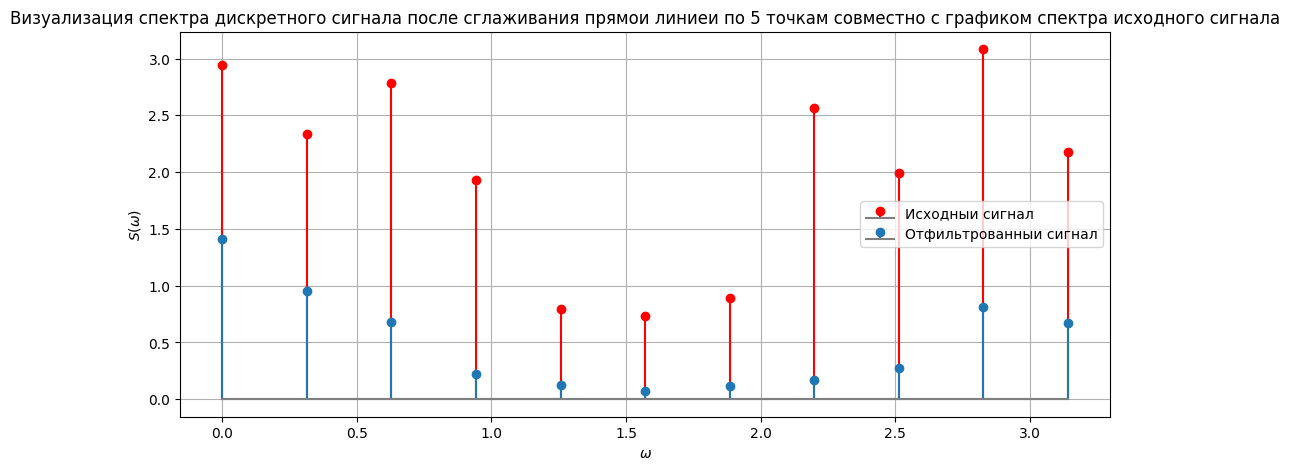

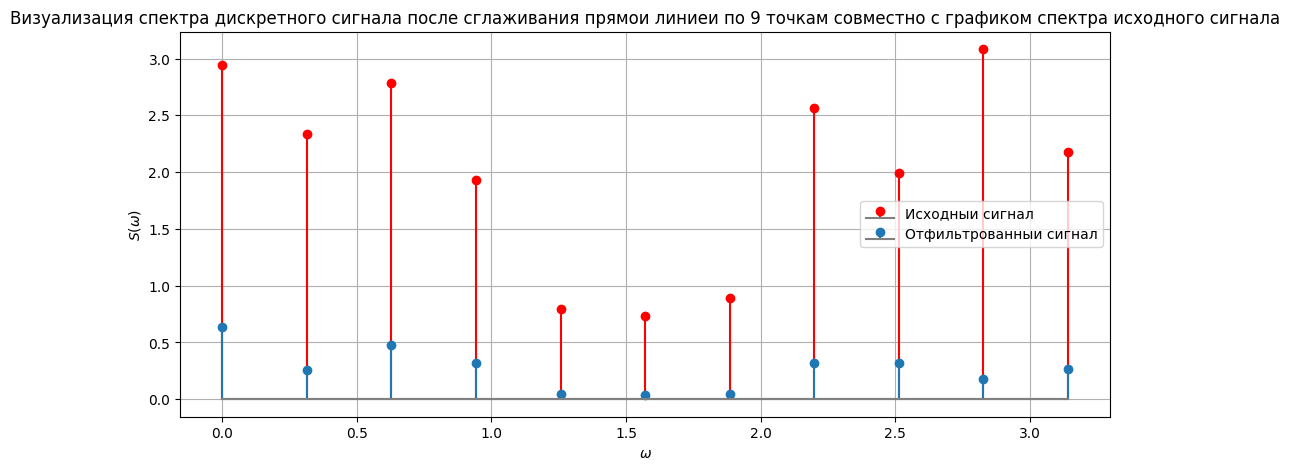

In [ ]:
filtered_linearly_5_dft = [compute_dft(w,
linearly_5_filtered_signal) for w in omega]
filtered_linearly_9_dft = [compute_dft(w,
linearly_9_filtered_signal) for w in omega]
plot_for_comparison(omega,
np.abs(filtered_linearly_5_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания прямои линиеи по 5 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(filtered_linearly_9_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после сглаживания прямои линиеи по 9 точкам совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

## Задание 7

Исходя из графиков, можно убедиться в том, что для линейного сглаживания по 5 точкам значение $ H(w) $ падает быстрее с увеличением $ w $. Это подтверждается графиками спектров: после фильтрации видно значительное ослабление амплитуд высокочастотных компонентов. Исходные низкие частоты (около 0) проходят практически без изменений, что соответствует $ H(0) \approx 1 $. Сглаживание по 9 точкам демонстрирует еще более выраженное подавление высоких частот. При $ w $ > 0.5 π $ амплитуды практически исчезаю. Это соответсвует теоретическим значения $ H(w) $.

## Задание 8

а. Дискретный фильтр, соответствующий численному дифференцированию 1 порядка. Общая формула передаточной функции дискретного фильтра, соответствующего численному дифференцированию 1-го порядка:

$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = i \sin \omega$


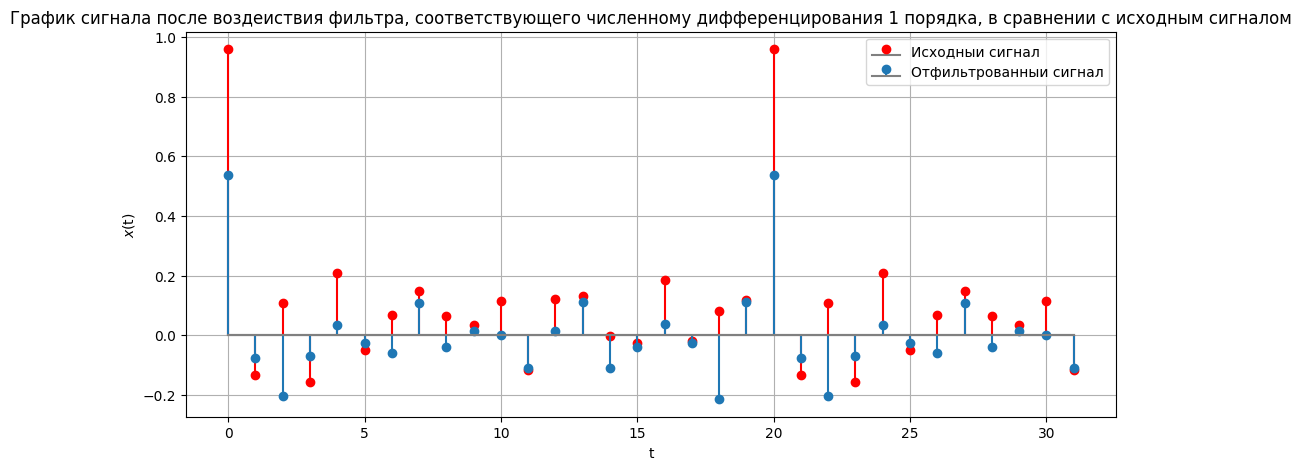

In [ ]:
transfer_function_for_digital_derivation = lambda w: (1j
* np.sin(w)).imag
model_filtered_by_recursion_filter_signal = lambda time, transfer_function: sum(A * transfer_function(omega) * np.cos(omega * time + phi))
filtered_digital_derivation_signal = [model_filtered_by_recursion_filter_signal(time, transfer_function_for_digital_derivation) for time in time_array]
plot_for_comparison(time_array, filtered_digital_derivation_signal, discreate_signal, "График сигнала после воздеиствия фильтра, соответствующего численному дифференцирования 1 порядка, в сравнении с исходным сигналом", "t", "$x$(t)")

Из полученных графиков можно предположить, что влияние
некоторых частот сильно ослабло, это предположение будет
проверено далее.

Ниже представлена визуализация дискретных отсчетов
спектра дискретного сигнала после его фильтрации совместно с
отчетами спектра исходного дискретного сигнала.


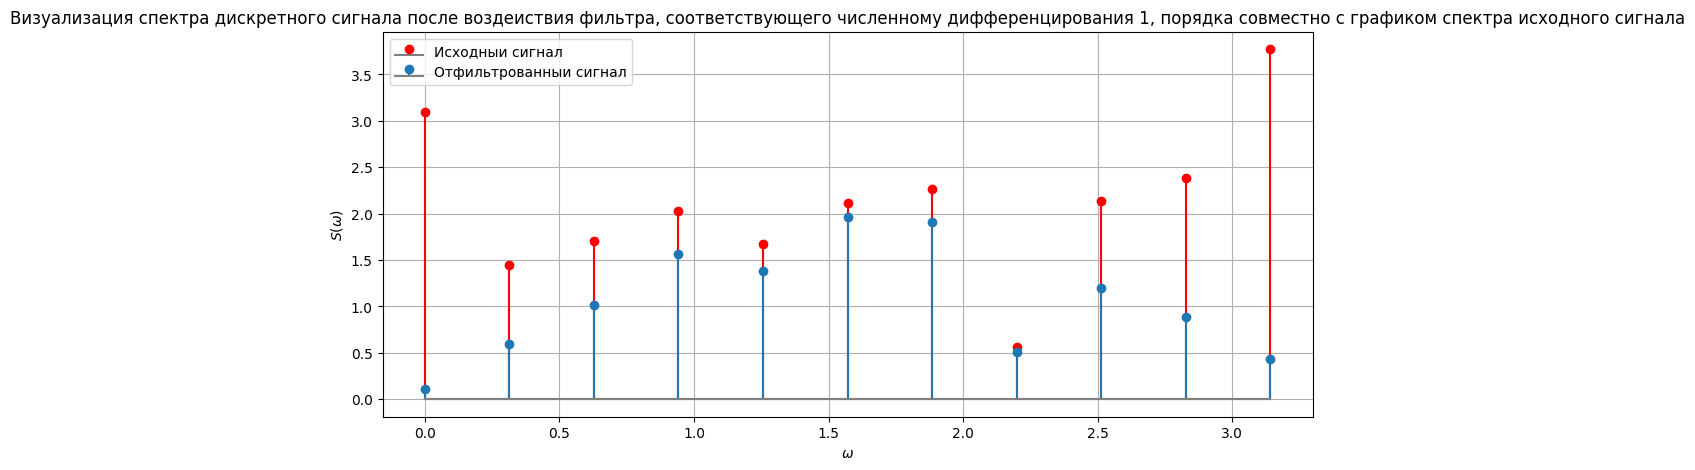

In [ ]:
filtered_digital_derivation_dft = [compute_dft(w, filtered_digital_derivation_signal) for w in omega]
plot_for_comparison(omega, np.abs(filtered_digital_derivation_dft), np.abs(dft), "Визуализация спектра дискретного сигнала после воздеиствия фильтра, соответствующего численному дифференцирования 1, порядка совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

Визуализация спектра дискретного сигнала после воздействия
фильтра, соответствующего численному дифференцирования 1,
порядка совместно с графиком спектра исходного сигнала

Построение графика передаточной функции для численного
дифференцирования. Это нужно для того, чтоб проаналазировать
влияние фильтра на сигнал.

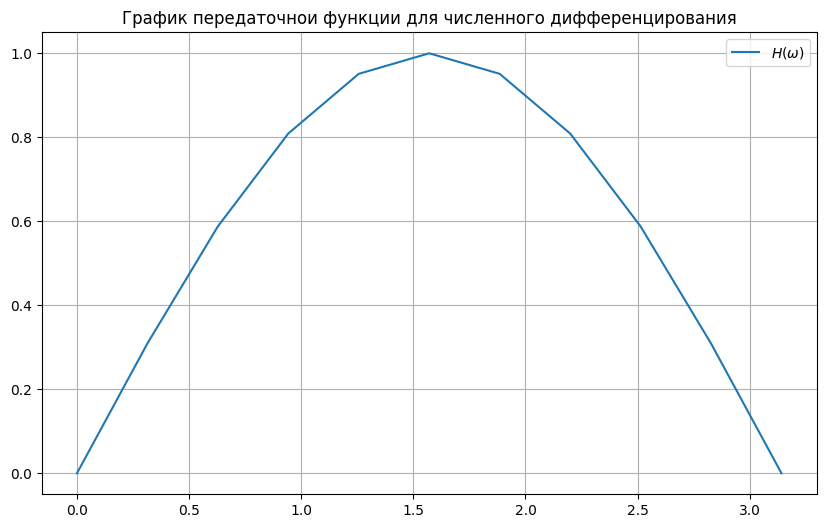

In [ ]:
def plot_for_transfer_function(omega, transfer_function, label):
  plt.figure(figsize=(10, 6))
  plt.plot(omega, transfer_function,
  label=f'$H(\\omega)$')
  plt.title(label)
  plt.grid(True)
  plt.legend()
  plt.show()
plot_for_transfer_function(omega, [transfer_function_for_digital_derivation(w) for w in omega], "График передаточнои функции для численного дифференцирования")

Из графика можно сделать вывод, что передаточная функция
имеет синусоидальную форму, имеет период 2π, в работе диапазон
круговой частоты от 0 до π, таким образом фильтр ослабил
воздействие малых частот на сигнал и сохранил воздействие
средних. Если бы рассматриваемый диапазон частот был от 0 до 2π,
то можно было бы убедиться в том, что данный фильтр ослабляет
воздействие ещё и высоких частот(больших, чем π).

b. Ниже представлена визуализация дискретного фильтра,
соответствующего численному интегрированию (прямоугольников,
трапеций, Симпсона).

Из одной из предыдущих работ можно найти формулы для
передаточных функций рекурсивных фильтров: фильтров,
соответствующих формулам трапеций, прямоугольника, Симпсона.
Формула передаточной функции рекурсивного фильтра,
соответствующего формуле трапеций:

$H(\omega) = \dfrac{\cos(0.5\omega)}{2i \sin(0.5\omega)}$


Формула передаточной функции рекурсивного фильтра,
соответствующего формуле прямоугольников:

$H(\omega) = \dfrac{1}{2i \sin(0.5\omega)}$

Формула передаточной функции рекурсивного фильтра,
соответствующего формуле Симпсона:

$H(\omega) = \dfrac{\cos(\omega) + 2}{3i \sin(\omega)}$


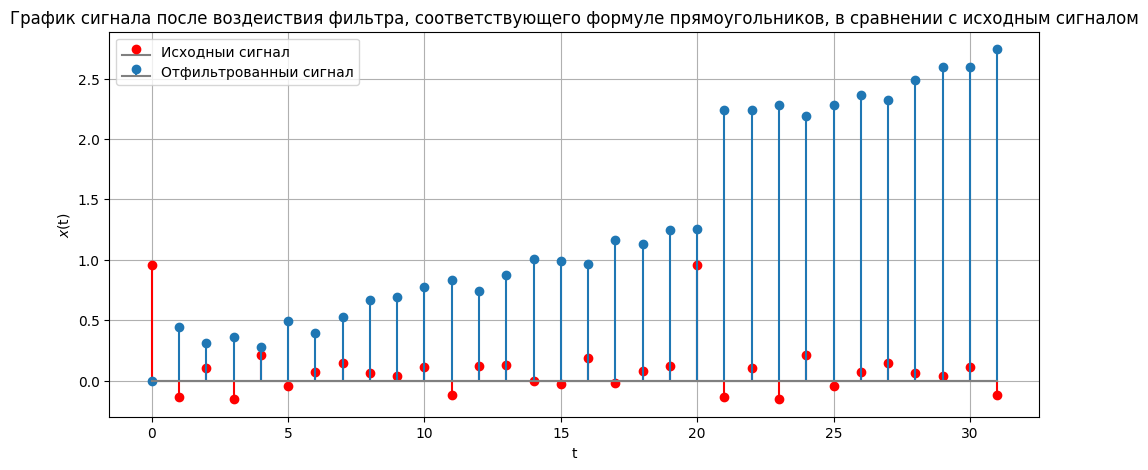

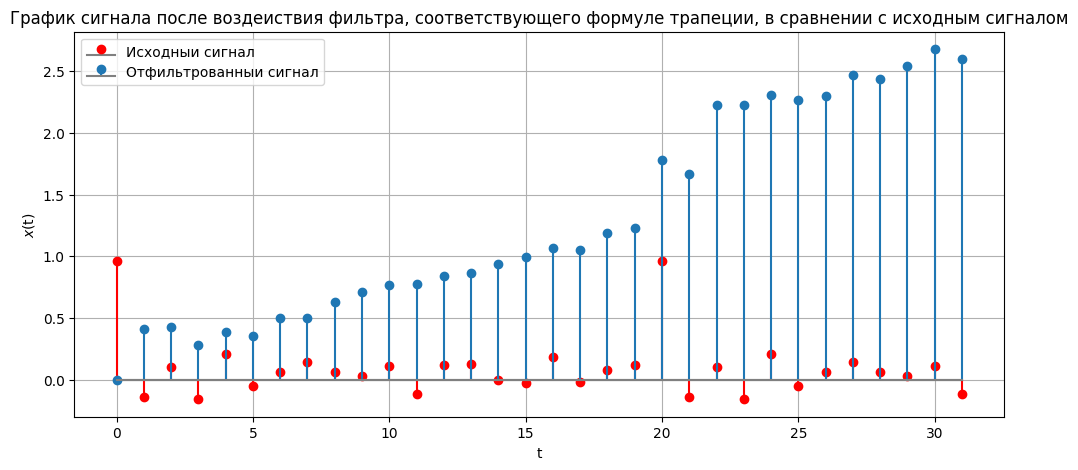

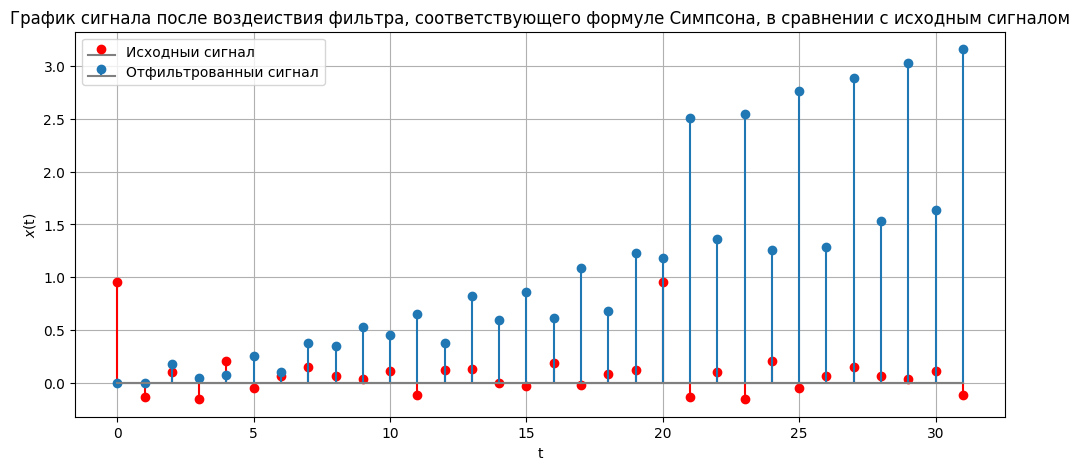

In [ ]:
def model_filtered_by_recursion_filter_signal(base_signal, analog_signal):
  simpson = np.zeros_like(base_signal)
  rectangle = np.zeros_like(base_signal)
  trapezoid = np.zeros_like(base_signal)
  for i in range(len(base_signal)- 1):
    trapezoid[i + 1] = rectangle[i] + 0.5 * (base_signal[i] + base_signal[i + 1])
    rectangle[i + 1] = rectangle[i] + analog_signal[i * 1000 + 500]
    if i != 0:
      simpson[i + 1] = simpson[i- 1] + (1/3) * (base_signal[i- 1] + 4 * base_signal[i] + base_signal[i + 1])
  return simpson, trapezoid, rectangle

filtered_Simpson_signal, filtered_trapezoid_signal, filtered_rectangle_signal = model_filtered_by_recursion_filter_signal(discreate_signal, analog_signal)
plot_for_comparison(time_array, filtered_rectangle_signal, discreate_signal, "График сигнала после воздеиствия фильтра, соответствующего формуле прямоугольников, в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, filtered_trapezoid_signal, discreate_signal, "График сигнала после воздеиствия фильтра, соответствующего формуле трапеции, в сравнении с исходным сигналом", "t", "$x$(t)")
plot_for_comparison(time_array, filtered_Simpson_signal, discreate_signal, "График сигнала после воздеиствия фильтра, соответствующего формуле Симпсона, в сравнении с исходным сигналом", "t", "$x$(t)")

Ниже представлена визуализация найденных с помощью ДПФ
дискретных отсчетов спектра дискретного сигнала после его
фильтрации совместно с отчетами спектра исходного дискретного
сигнала.

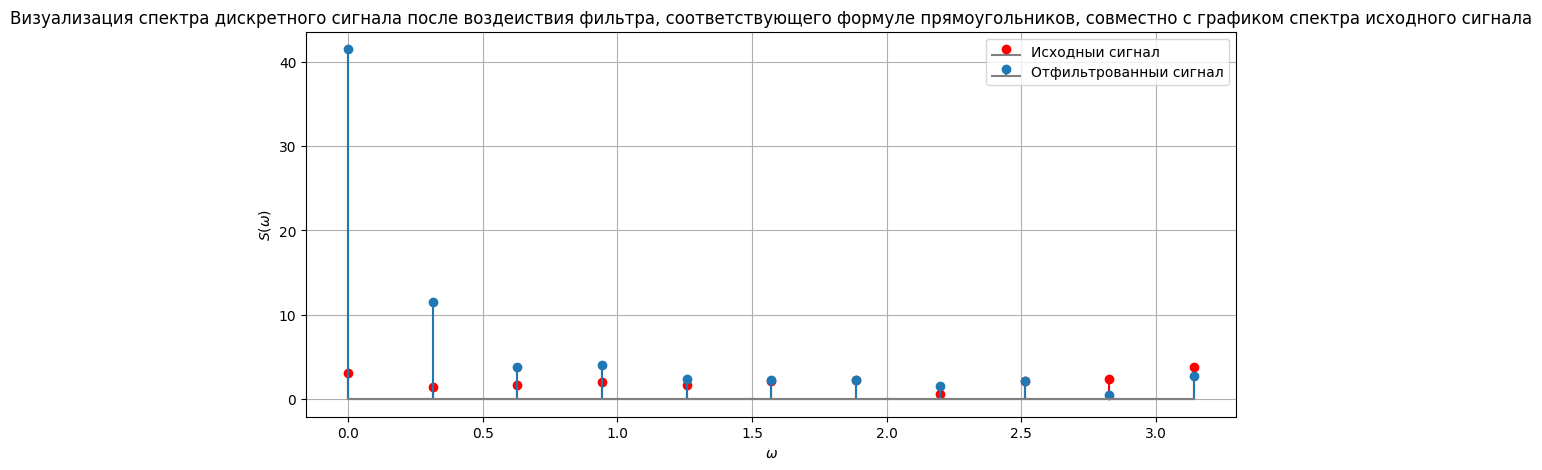

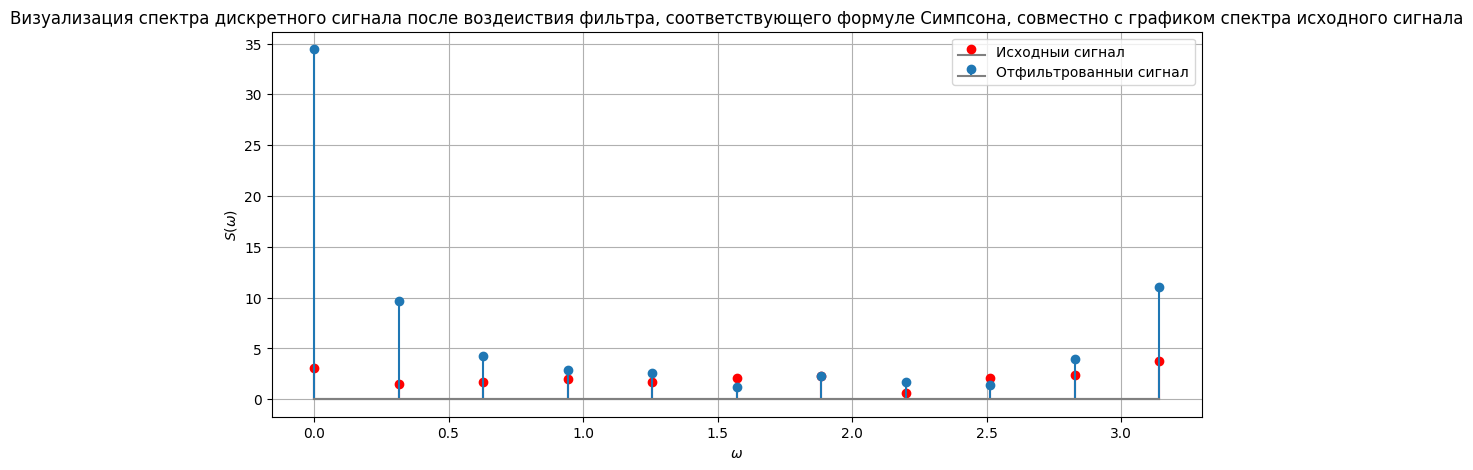

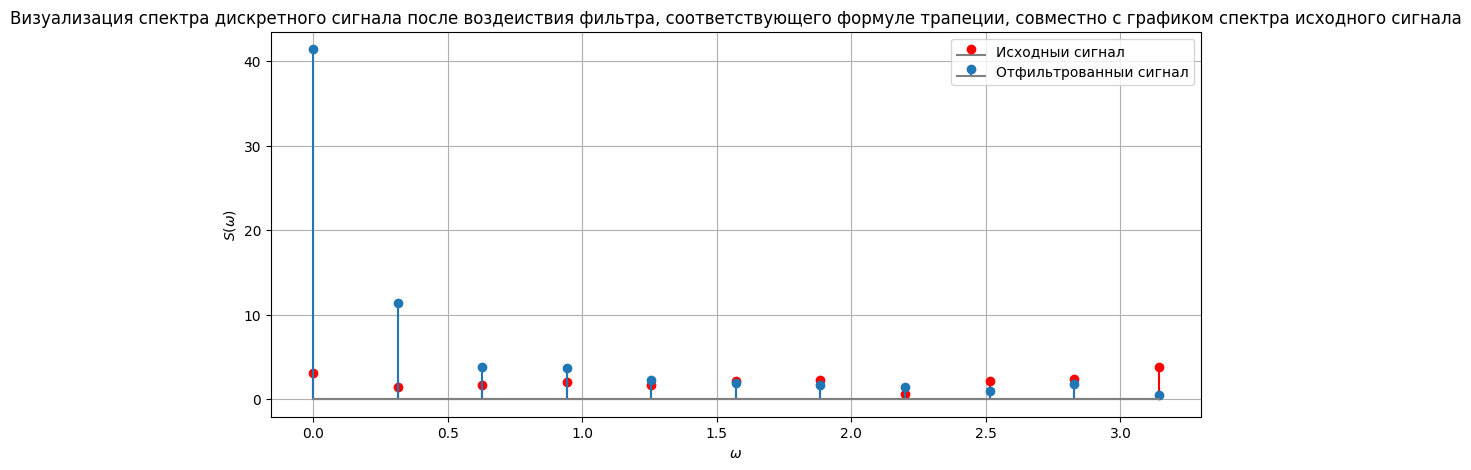

In [ ]:
spectrum_Simpson = [compute_dft(w, filtered_Simpson_signal) for w in omega]
spectrum_rectangle = [compute_dft(w, filtered_rectangle_signal) for w in omega]
spectrum_trapezoid = [compute_dft(w, filtered_trapezoid_signal) for w in omega]
plot_for_comparison(omega, np.abs(spectrum_rectangle),
np.abs(dft), "Визуализация спектра дискретного сигнала после воздеиствия фильтра, соответствующего формуле прямоугольников, совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(spectrum_Simpson),
np.abs(dft), "Визуализация спектра дискретного сигнала после воздеиствия фильтра, соответствующего формуле Симпсона, совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")
plot_for_comparison(omega, np.abs(spectrum_trapezoid),
np.abs(dft), "Визуализация спектра дискретного сигнала после воздеиствия фильтра, соответствующего формуле трапеции, совместно с графиком спектра исходного сигнала","$\\omega$", "$S(\\omega)$")

Из полученных графиков можно сделать вывод, что при
фильтрации с использованием формул трапеций и прямоугольников
низкие частоты значительно усиливаются, в то время как средние и высокие частоты подавляются на рассматриваемом диапазоне частот
( от 0 до π). В свою очередь, при применении формулы Симпсона
наблюдается сильное усиление низких частот, подавление средних
частот и некоторое усиление высоких частот на этом же диапазоне.
Эти наблюдения подтверждаются графиками передаточных функций
соответствующих фильтров.


## **Вывод**


В ходе лабораторной работы были исследованы результаты фильтрации дискретного сигнала с помощью рекурсивных фильтров, основанных на формулах численного интегрирования и дифференцирования. Рассматривались фильтры, построенные на основе формул численного интегрирования (метод прямоугольников, трапеций и формула Симпсона), а также фильтр численного дифференцирования первого порядка. Анализ результатов выполнялся с применением дискретного преобразования Фурье (ДПФ).

Исследование частотных характеристик показало, что:
- фильтры численного интегрирования, основанные на формулах прямоугольников и трапеций, обеспечивают выраженное усиление низкочастотных компонент сигнала и подавление средних и высокочастотных составляющих;
- фильтр, реализованный на основе формулы Симпсона, также усиливает низкие частоты, подавляет средние, но при этом слегка повышает уровень высоких частот;
- численное дифференцирование первого порядка ослабляет влияние низкочастотных составляющих и сохраняет вклад средних частот.  

Если бы рассматривался частотный диапазон от 0 до 2π, можно было бы увидеть, что данный фильтр дополнительно ослабляет и высокие частоты (более π).

Проведённый анализ спектральных характеристик подтвердил соответствие экспериментальных данных теоретическим частотным характеристикам передаточных функций H(ω). Графическая визуализация исходных и отфильтрованных сигналов наглядно показала изменения, вносимые каждым типом фильтра, и подтвердила их эффективность при выделении или подавлении определённых диапазонов частот.
